# Binärgewitter 2023

So wenig wurde noch nie gepodcasted!   

Let's take a look:
Zuerst müssen wir alle librarys importieren und Daten laden.

In [1]:
import pandas as pd
import calmap

In [2]:
podcasts = pd.read_csv("data/2023.csv", sep=",", index_col=1)

## Übersicht

Diese Jahr habe wir einige Sendungen veröffentlicht:

In [3]:
total_count = len(podcasts.index)
talk_count = len(podcasts[podcasts.Type == "Talk"].index)
westcoast_count = len(podcasts[podcasts.Type == "Westcoast"].index)

print(f"Talk:      {talk_count}")
print(f"Westcoast: {westcoast_count}")
print(f"Total:     {total_count}")

Talk:      20
Westcoast: 0
Total:     20


2023 haben wir 20 Sendungen gemacht! Genau gleichviel wie 2022.

## Binärgewitter Talk

In [4]:
distance_between_recordings = 52 / talk_count
print(f"Für Binärgewitter Talk sind das alle {distance_between_recordings} Wochen eine Sendung.")

Für Binärgewitter Talk sind das alle 2.6 Wochen eine Sendung.


Wir machen ein Kopie und schauen uns nur die BGT Talk Sendungen genauer an.

In [5]:
talk = podcasts[podcasts.Type == "Talk"]
talk.drop(columns=['pfleidi', 'marc'])

,Name,Type,Duration,ingo,l33tname,madmas,makefu
Date,,,,,,,
30.12.2023,Binärgewitter Talk #328: moderne Lava-Lampe am...,Talk,00:48:35,0,1,1,0
19.12.2023,Binärgewitter Talk #327: meine AI ist in der P...,Talk,01:30:08,1,0,1,1
5.12.2023,Binärgewitter Talk #326: AI-lluminaten,Talk,02:24:19,1,1,1,1
18.11.2023,Binärgewitter Talk #325: von Roboter für Roboter,Talk,02:35:00,1,1,1,1
2.11.2023,Binärgewitter Talk #324: im Keller ist es bill...,Talk,02:09:14,1,1,1,1
5.10.2023,Binärgewitter Talk #323: Curry mit OpenTofu,Talk,01:53:13,1,1,1,0
20.9.2023,Binärgewitter Talk #322: markus von den Medien,Talk,02:48:08,1,1,1,0
2.9.2023,Binärgewitter Talk #321: 8 Sekunden sind uns z...,Talk,02:16:27,0,1,1,1
21.8.2023,Binärgewitter Talk #320: Für die Liebe zu systemd,Talk,01:47:35,1,0,0,1


### Sendungen pro Host:

In [6]:
ingo_count = talk["ingo"].sum()
l33tname_count = talk["l33tname"].sum()
madmas_count = talk["madmas"].sum()
makefu_count = talk["makefu"].sum()


print(f"ingo:     {ingo_count}")
print(f"l33tname: {l33tname_count}")
print(f"madmas:   {madmas_count}")
print(f"makefu:   {makefu_count}")

ingo:     17
l33tname: 13
madmas:   19
makefu:   16


In Prozen sind das:

In [7]:
print(f"ingo:      {ingo_count/talk_count:.0%}")
print(f"makefu:    {makefu_count/talk_count:.0%}")
print(f"l33tname:  {l33tname_count/talk_count:.0%}")
print(f"madmas:    {madmas_count/talk_count:.0%}")

ingo:      85%
makefu:    80%
l33tname:  65%
madmas:    95%


Damit ist madmas MVP der gerade mal 1 Sendung verpasst hat.

### Duration

Da der feed jetzt eine duration pro Sendung angibt kann man jetzt auch interessante Auswertungen machen.

In [8]:
import datetime

convert_duration_to_sec = lambda v: (int(v.split(":")[0]) * 60*60) + (int(v.split(":")[1]) * 60) + int(v.split(":")[2])
talk['Duration_sec'] = talk['Duration'].transform(convert_duration_to_sec)

Unsere totale Sendezeit war diese Jahr:

In [9]:
total_sec = int(talk['Duration_sec'].sum())
str(datetime.timedelta(seconds=total_sec))

'1 day, 17:58:42'

Im Durchschnitt ist eine Sendung:

In [10]:
avg_sec = int(talk['Duration_sec'].mean())
str(datetime.timedelta(seconds=avg_sec))

'2:05:56'

Die kürzeste Sendung die wir diese Jahr gemacht haben:

In [11]:
shortes_episode = talk[talk['Duration_sec'] == talk['Duration_sec'].min()]
shortes_episode

,Name,Type,Duration,ingo,l33tname,madmas,makefu,pfleidi,marc,Duration_sec
Date,,,,,,,,,,
30.12.2023,Binärgewitter Talk #328: moderne Lava-Lampe am...,Talk,00:48:35,0,1,1,0,0,0,2915


Und nicht zuletzt die längste Sendung:

In [12]:
longest_episode = talk[talk['Duration_sec'] == talk['Duration_sec'].max()]
longest_episode

,Name,Type,Duration,ingo,l33tname,madmas,makefu,pfleidi,marc,Duration_sec
Date,,,,,,,,,,
19.5.2023,"Binärgewitter Talk #315: ChatGPT, confident ab...",Talk,03:34:07,1,1,1,1,0,0,12847


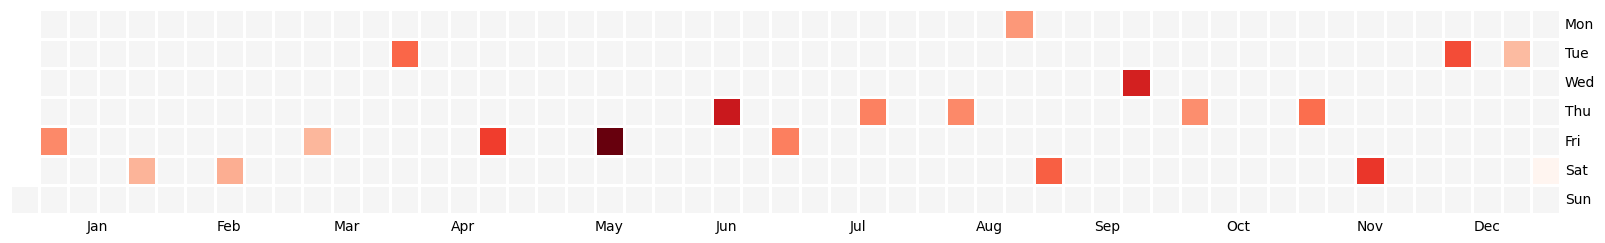

In [13]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"]=20,20

talk.index = pd.to_datetime(talk.index, dayfirst=True)
calmap.yearplot(talk['Duration_sec']);